In [1]:
!pip install gluoncv
!pip install mxnet

    100% |████████████████████████████████| 143kB 4.5MB/s 
    100% |████████████████████████████████| 51kB 6.2MB/s 
    100% |████████████████████████████████| 26.1MB 1.6MB/s 


In [0]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [3]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

Model file is not found. Downloading.


100%|██████████| 132724/132724 [00:04<00:00, 30458.25KB/s]


In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')


117KB [00:00, 3084.59KB/s]             


In [20]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tan2.jpg to tan2.jpg
User uploaded file "tan2.jpg" with length 181699 bytes


In [0]:
#from mxnet import image
#img = image.imread('tan2.jpg')

In [22]:
!ls

datalab  street_small.jpg  tan2.jpg


In [23]:
x, img = data.transforms.presets.ssd.load_test('tan2.jpg', short=512)#im_fname
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 682)


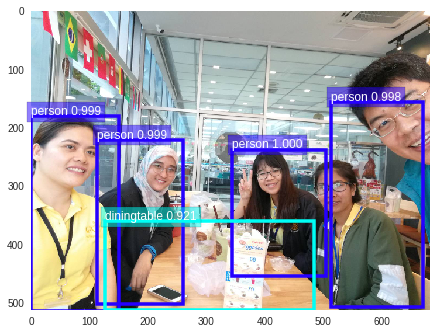

In [24]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
ax.grid(False)
plt.savefig('testplot.png')
plt.show()

In [25]:

!ls
files.download('testplot.png') 

datalab  street_small.jpg  tan2.jpg  testplot.png
